# Store the node features & edge properties in the graph:

In [1]:
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from grace.base import GraphAttrs
from grace.io.image_dataset import ImageGraphDataset

from grace.io.store_node_features import store_node_features_in_graph
from grace.io.store_edge_properties import store_edge_properties_in_graph

from grace.models.datasets import dataset_from_graph

/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <6A7076EE-85BD-37A7-BC35-1D4867F2B3D3> /Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvisio

In [15]:
extractor_fn = "/Users/kulicna/Desktop/classifier/extractor/resnet152.pt"
data_path = "/Users/kulicna/Desktop/dataset/playground/infer/"
data_path, extractor_fn

('/Users/kulicna/Desktop/dataset/playground/infer/',
 '/Users/kulicna/Desktop/classifier/extractor/resnet152.pt')

In [16]:
# store_node_features_in_graph(data_path, extractor_fn)

In [17]:
store_edge_properties_in_graph(data_path=data_path)

10/06/2023 08:17:33 PM MRC_Synthetic_File_002
10/06/2023 08:17:33 PM Nodes count | [97, 102, 0] x | [48.74, 51.26, 0.0] %
10/06/2023 08:17:33 PM Edges count | [452, 127, 0] x | [78.07, 21.93, 0.0] %
10/06/2023 08:17:33 PM Relabelled 'Annotation.UNKNOWN'
10/06/2023 08:17:33 PM Nodes count | [97, 102, 0] x | [48.74, 51.26, 0.0] %
10/06/2023 08:17:33 PM Edges count | [452, 127, 0] x | [78.07, 21.93, 0.0] %
10/06/2023 08:17:34 PM MRC_Synthetic_File_004
10/06/2023 08:17:34 PM Nodes count | [97, 109, 0] x | [47.09, 52.91, 0.0] %
10/06/2023 08:17:34 PM Edges count | [482, 120, 0] x | [80.07, 19.93, 0.0] %
10/06/2023 08:17:34 PM Relabelled 'Annotation.UNKNOWN'
10/06/2023 08:17:34 PM Nodes count | [97, 109, 0] x | [47.09, 52.91, 0.0] %
10/06/2023 08:17:34 PM Edges count | [482, 120, 0] x | [80.07, 19.93, 0.0] %


# Unwrap the graph:

In [5]:
dataset = ImageGraphDataset(
    image_dir=data_path, 
    grace_dir=data_path, 
)
image, target = dataset[0]
G = target["graph"]
G.number_of_nodes(), G.number_of_edges()

10/06/2023 08:17:03 PM MRC_Synthetic_File_000
10/06/2023 08:17:03 PM Nodes count | [94, 96, 0] x | [49.47, 50.53, 0.0] %
10/06/2023 08:17:03 PM Edges count | [434, 120, 0] x | [78.34, 21.66, 0.0] %
10/06/2023 08:17:03 PM Relabelled 'Annotation.UNKNOWN'
10/06/2023 08:17:03 PM Nodes count | [94, 96, 0] x | [49.47, 50.53, 0.0] %
10/06/2023 08:17:03 PM Edges count | [434, 120, 0] x | [78.34, 21.66, 0.0] %


(190, 554)

In [6]:
for src, dst, edge in G.edges(data=True):
    print (src, dst, edge)
    print (edge[GraphAttrs.EDGE_PROPERTIES])
    break


0 98 {<GraphAttrs.EDGE_GROUND_TRUTH: 'edge_ground_truth'>: <Annotation.TRUE_NEGATIVE: 0>, <GraphAttrs.EDGE_PROPERTIES: 'edge_properties'>: Properties(properties_dict={'src_pos_x_raw': 485.9488, 'src_pos_y_raw': 2530.3833, 'dst_pos_x_raw': 272.67072, 'dst_pos_y_raw': 2661.2422, 'mid_pos_x_raw': 379.30975, 'mid_pos_y_raw': 2595.8127, 'edge_length_raw': 250.22307, 'edge_orient_rad': 0.14509681, 'edge_orient_deg': 8.313435, 'east_pos_x_raw': 666.6563, 'east_pos_y_raw': 2781.0508, 'east_to_mid_length_raw': 341.87888, 'east_to_mid_orient_rad': 0.19213131, 'east_triangle_area_raw': 38554.53, 'west_pos_x_raw': 295.17972, 'west_pos_y_raw': 2155.993, 'west_to_mid_length_raw': 447.79385, 'west_to_mid_orient_rad': 0.1410019, 'west_triangle_area_raw': 52406.543, 'edge_length_nrm': 0.81683546, 'west_to_mid_length_nrm': 1.4617913, 'east_to_mid_length_nrm': 1.1160394, 'west_triangle_area_nrm': 1.7843546, 'east_triangle_area_nrm': 1.3127168})}
Properties(properties_dict={'src_pos_x_raw': 485.9488, 'src

In [7]:
uniqueness = set([len(edge[GraphAttrs.EDGE_PROPERTIES].property_keys) for _, _, edge in G.edges(data=True)])
uniqueness

{24}

## Build the dataset:

In [8]:
data_list = dataset_from_graph(G, num_hops=1)
data_list[0]

Data(x=[7, 2048], edge_index=[2, 12], y=[7], edge_label=[12], edge_properties=[12, 8])

In [9]:
num_properties = data_list[0].edge_properties.shape[-1]
num_features = data_list[0].x.shape[-1]
num_properties, num_features


(8, 2048)

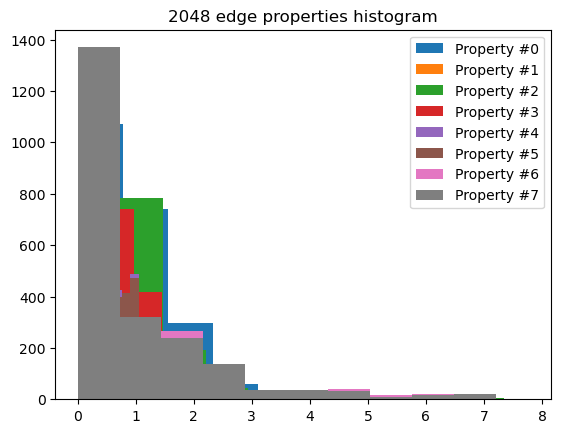

In [10]:
for i in range(num_properties):
    props = []
    for data in data_list:
        props.extend(data.edge_properties[:, i].tolist())
    plt.hist(props, label=f"Property #{i}")
plt.title(f"{num_features} edge properties histogram")
plt.legend()
plt.show()


100%|██████████| 2048/2048 [00:12<00:00, 161.07it/s]


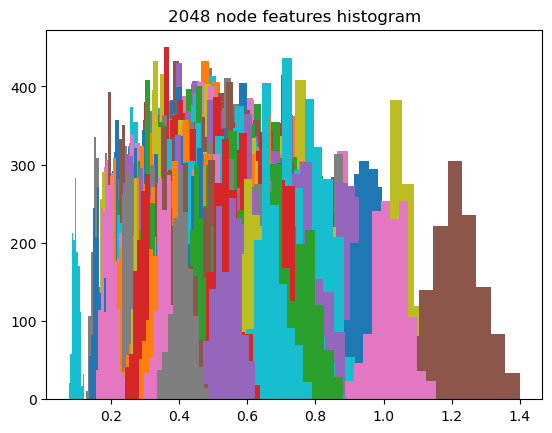

In [11]:
for i in tqdm(range(num_features)):
    props = []
    for data in data_list:
        props.extend(data.x[:, i].tolist())
    plt.hist(props)

plt.title(f"{num_features} node features histogram")
plt.show()


##### Done!